In [1]:
# Import some libraries
import os
import numpy as np
import mne
import glob
import os
%matplotlib qt 

# define dir
data_directory = 'C:/Users/mvmigem/Documents/data/project_1/preprocessed/localiser/'
dir_list = glob.glob(data_directory+'*')

In [2]:
# Load epochs
epochs = []
for i, path in enumerate(dir_list):
    epoch = mne.read_epochs(path)
    epochs.append(epoch)

Reading C:\Users\mvmigem\Documents\data\project_1\preprocessed\localiser\sub01_localiser-epo.fif ...
    Found the data of interest:
        t =     -97.66 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
210 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\mvmigem\Documents\data\project_1\preprocessed\localiser\sub02_localiser-epo.fif ...
    Found the data of interest:
        t =     -97.66 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
205 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\mvmigem\Documents\data\project_1\preprocessed\localiser\sub03_localiser-epo.fif ...
    Found the data of interest:
        t =     -97.66 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
221 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\mv

In [14]:
# Agragate over over all trials directly
ep_pos1 = []
ep_pos2 = []
ep_pos3 = []
ep_pos4 = []

for i, epoch in enumerate(epochs):
    ep_pos1.append(epoch['position1'])
    ep_pos2.append(epoch['position2'])
    ep_pos3.append(epoch['position3'])
    ep_pos4.append(epoch['position4'])

eps_pos1 = mne.concatenate_epochs(ep_pos1)
eps_pos2 = mne.concatenate_epochs(ep_pos2)
eps_pos3 = mne.concatenate_epochs(ep_pos3)
eps_pos4 = mne.concatenate_epochs(ep_pos4)

av_ep_pos1 = eps_pos1.average()
av_ep_pos2 = eps_pos2.average()
av_ep_pos3 = eps_pos3.average()
av_ep_pos4 = eps_pos4.average()

Not setting metadata
826 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
833 matching events found
Applying baseline correction (mode: mean)


C:\Users\mvmigem\AppData\Local\Temp\ipykernel_7712\2241026841.py:13: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  eps_pos1 = mne.concatenate_epochs(ep_pos1)
C:\Users\mvmigem\AppData\Local\Temp\ipykernel_7712\2241026841.py:14: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  eps_pos2 = mne.concatenate_epochs(ep_pos2)


Not setting metadata
833 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
829 matching events found
Applying baseline correction (mode: mean)


C:\Users\mvmigem\AppData\Local\Temp\ipykernel_7712\2241026841.py:15: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  eps_pos3 = mne.concatenate_epochs(ep_pos3)
C:\Users\mvmigem\AppData\Local\Temp\ipykernel_7712\2241026841.py:16: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  eps_pos4 = mne.concatenate_epochs(ep_pos4)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [41]:
# Agragate over subs first
evokeds = []

for i, ep in enumerate(epochs):
    
    evoked_pos1 = ep['position1'].average()
    evoked_pos2 = ep['position2'].average()
    evoked_pos3 = ep['position3'].average()
    evoked_pos4 = ep['position4'].average()

    evoked = [evoked_pos1, evoked_pos2, evoked_pos3, evoked_pos4]
    evokeds.append(evoked)
evokeds = np.array(evokeds)
grand_av_pos1 = mne.grand_average(list(evokeds[:,0]))
grand_av_pos2 = mne.grand_average(list(evokeds[:,1]))
grand_av_pos3 = mne.grand_average(list(evokeds[:,2]))
grand_av_pos4 = mne.grand_average(list(evokeds[:,3]))

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy functi

In [37]:
el = evokeds[:,0]

In [74]:
# 

# grand_av_list = [grand_av_pos1,grand_av_pos2,grand_av_pos3,grand_av_pos4]
grand_av_list = [av_ep_pos1, av_ep_pos2, av_ep_pos3, av_ep_pos4]
conds = ('position1','position2','position3','position4')

evoked_pos = dict(zip(conds, grand_av_list))

# Plot it all
epoch_set1 = evoked_pos
scale = [-6, 6]
# mne.viz.plot_compare_evokeds(epoch_set1, picks= 'Pz', vlines=[0.05,0.1],ylim=dict(eeg=scale))
mne.viz.plot_compare_evokeds(epoch_set1, picks= 'POz', vlines=[0.05,0.1],ylim=dict(eeg=scale))
# mne.viz.plot_compare_evokeds(epoch_set1, picks= 'Oz', vlines=[0.05,0.1],ylim=dict(eeg=scale))

[<Figure size 800x600 with 2 Axes>]

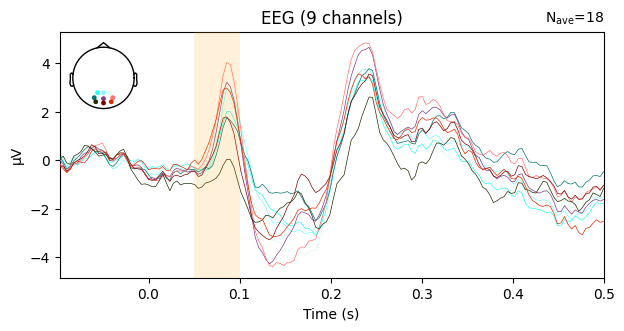

In [67]:
grand_av_pos4.plot(picks=['P1','Pz','P2','PO3','POz','PO4','Oz','O1','O2',],highlight=[0.05,0.1])

No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


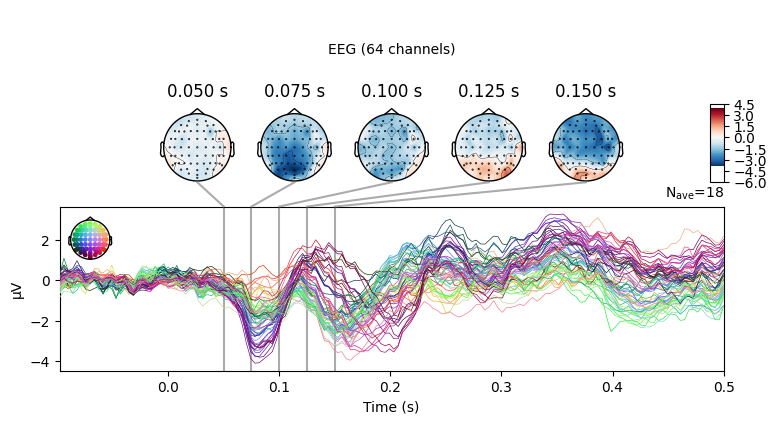

In [46]:
times = np.linspace(0.05, 0.15, 5)
grand_av_pos1.plot_joint(times=times)

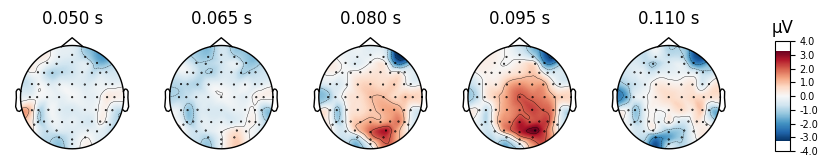

In [68]:
times = np.linspace(0.05, 0.11, 5)
# grand_av_pos1.plot_topomap(ch_type="eeg", times=times, colorbar=True)
# grand_av_pos2.plot_topomap(ch_type="eeg", times=times, colorbar=True)
# grand_av_pos3.plot_topomap(ch_type="eeg", times=times, colorbar=True)
grand_av_pos4.plot_topomap(ch_type="eeg", times=times, colorbar=True)